In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
%matplotlib inline

In [2]:
def f(r,t):
    
    """
    For some given function with an input r and timestep t, we output the derivative of every value,
    which is in turn used in the rk4 integration 
    """
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    
    Dx = vx
    Dy = vy
    
    R = np.sqrt(x**2 + y**2)
    

    V = np.sqrt(vx**2 + vy**2)
    Dvx = -G*M*x/R**3 - AA*vx / (V**3 + BB)
    
    Dvy = -G*M*y/R**3 - AA*vy / (V**3 + BB)
    
    
    
    
    return np.array([Dx,Dy,Dvx,Dvy])

def rk4(h,r,f):
    """
    RK4 Integration for some step size of h
    
    """
    
    k1 = h*f(r,t)
    k2 = h*f(r + 0.5*k1,t+0.5*h)
    k3 = h*f(r + 0.5*k2,t+0.5*h)
    k4 = h*f(r + k3,t+h)

    rout = r + (k1 + 2*k2 + 2*k3 + k4)/6 #update occurs here
    return rout

In [3]:
h = 1e-4 # This is the initial stepping size. 
delta = 1e-6 # error tolerance 
int_time = 9000 #ends after about 10 orbits. 
rcrit = 1e-7
G = M  = 1
rapo = 1
a = (1 + 1e-7)/2
vy = .8*.5


In [6]:

AA = 1
BBs = [.5,.9,1,2.5,5,7.5,10]
t_crits = []
for BB in BBs:
    print("Ratio = ", BB/AA)
    t = 0 #initialize as 0 time 
    ratios = []
    t_gw = []
    #break if  below critical r

    r0 = np.array([1.0,0.0,0.0,vy],float)
    h = 1e-4 # This is the initial stepping size. 

    r_sols = []
    ts = []
    while t < int_time: 
        rtemp = rk4(h, r0, f)
        # Error at h and 2*h
        rError1 = rk4(h, rtemp, f)
        rError2 = rk4(2*h, r0, f)
        xerror = (rError1[0] - rError2[0])/30.  # 0th element -> x component
        yerror = (rError1[1] - rError2[1])/30.
        rho = h*delta/np.sqrt(xerror**2 + yerror**2)

        # If rho > 1, actual accuracy is better than the target accuracy. Keep it.
        if rho > 1:
            t += h
            r0 = rtemp
            h = h*rho**(1/4) # Make it bigger since rho^1/4 > 1

            #save values and time step below
            r_sols.append(rtemp)
            ts.append(t)

            rtest = np.sqrt(rtemp[0]**2 + rtemp[1]**2)
            if rtest<= rcrit:
                t_crits.append(t)
                break

        elif rho < 1:
            h = h * rho**(1/4)        
        else:
            h = 10 #reset to something much larger

    xs = [x[0] for x in r_sols]
    vxs = [x[2] for x in r_sols]


    ys = [y[1] for y in r_sols]
    vys = [y[3] for y in r_sols]

    rs = np.sqrt(np.power(xs,2) + np.power(ys,2))


Ratio =  0.5
Ratio =  0.9


/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in double_scalars
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in double_scalars
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in add


Ratio =  1.0
Ratio =  2.5
Ratio =  5.0
Ratio =  7.5
Ratio =  10.0


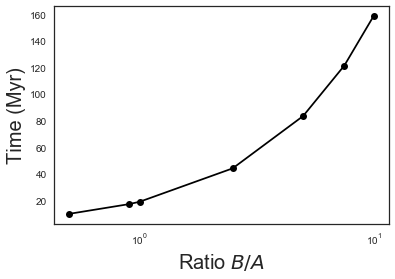

In [8]:
plt.plot(np.array(BBs)/AA,1.427*np.array(t_crits),'ko-')
plt.xlabel("Ratio $B/A$",fontsize=20)
plt.ylabel('Time (Myr)', fontsize=20)
plt.xscale('log')

Text(0, 0.5, '$log(r)$')

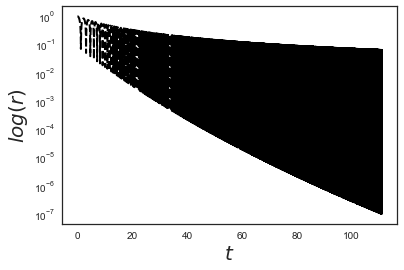

In [9]:
plt.plot(ts,rs,'k--',linewidth=2)
plt.yscale('log')
plt.xlabel("$t$",fontsize=20)
plt.ylabel('$log(r)$',fontsize=20)

# d) Do your results depend on the value of the initial velocity? Do they only depend on the ratio of B/A, or on the individual values of B and A?

The results do depend on the initial velocity, depending on the parameters of A and B. Furthermore, the results do not only depend on the ratio B/A, but also on the individual values of each. 

To understand why initial velocity matters, we need to think about this problem in it's physical setting. Depending on how fast the black hole we are tracking is able to go, there will more or less drag affecting the black hole, and in turn affecting the amount of time it takes for it to reach a pericenter at which gravitational radiation has an effect. 

To demonstrate such a result, I have included below a plot of the different convergence times (for a constant ratio of 1) where the initial velocity is allowed to vary. 


In [26]:

AA = 1
BB = 1
vy0s = [.1,.25,.5,.75]
t_crits = []
for vy in vy0s:
    t = 0 #initialize as 0 time 
    ratios = []
    t_gw = []
    #break if  below critical r

    r0 = np.array([1.0,0.0,0.0,vy],float)
    h = 1e-4 # This is the initial stepping size. 

    r_sols = []
    ts = []
    while t < int_time: 
        rtemp = rk4(h, r0, f)
        # Error at h and 2*h
        rError1 = rk4(h, rtemp, f)
        rError2 = rk4(2*h, r0, f)
        xerror = (rError1[0] - rError2[0])/30.  # 0th element -> x component
        yerror = (rError1[1] - rError2[1])/30.
        rho = h*delta/np.sqrt(xerror**2 + yerror**2)

        # If rho > 1, actual accuracy is better than the target accuracy. Keep it.
        if rho > 1:
            t += h
            r0 = rtemp
            h = h*rho**(1/4) # Make it bigger since rho^1/4 > 1

            #save values and time step below
            r_sols.append(rtemp)
            ts.append(t)

            rtest = np.sqrt(rtemp[0]**2 + rtemp[1]**2)
            if rtest<= rcrit:
                t_crits.append(t)
                break

        elif rho < 1:
            h = h * rho**(1/4)        
        else:
            h = 10 #reset to something much larger

    xs = [x[0] for x in r_sols]
    vxs = [x[2] for x in r_sols]


    ys = [y[1] for y in r_sols]
    vys = [y[3] for y in r_sols]

    rs = np.sqrt(np.power(xs,2) + np.power(ys,2))


/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in double_scalars
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in double_scalars
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in add


Text(0, 0.5, 'Time (Myr)')

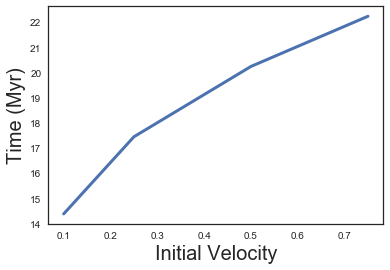

In [28]:
plt.plot(vy0s,1.427*np.array(t_crits),linewidth=3)
plt.xlabel("Initial Velocity",fontsize=20)
plt.ylabel("Time (Myr)",fontsize=20)

From here, we clearly see what was expected! If the black hole is moving faster to start, it will take longer to slow down.


Additionally, we also believe that not only does the ratio itself matter, but the individual values for A and B as well. While the ratio is essential for determining the decay time (if B>>A, decay will be faster), the individual importance of each is a result of the second term in the denominator, the total velocity of the black hole cubed. So even if the ratio of A and B is extremely in the favor of A (in the event B is extremely small), this does not necessarily mean that it will take a very long time for the black hole to decay, as $B + V_{BH}^3 = V_{BH}^3$, so now the individual affect of B in turn means the decay time is in the hands of the velocity of the black hole, which is something we just discovered has it's own impact on the decay time, separate from the ratio of the two terms B and A. 